In [27]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
data=input_data.read_data_sets("data/MNIST/",one_hot=True) 
#one_hot= Whether to make the labels into a binary array

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [7]:
print("Size of:")
print("Training set \t\t{}".format(len(data.train.labels)))
print("Test set\t\t{}".format(len(data.test.labels)))
print("Validation set\t\t{}".format(len(data.validation.labels)))

Size of:
Training set 		55000
Test set		10000
Validation set		5000


In [45]:
data.test.cls=np.array([label.argmax() for label in data.test.labels])

In [34]:
imgSize=28
imgSizeFlat=imgSize*imgSize
imgShape=(imgSize,imgSize)
noClasses=10
batchSize=100

In [25]:
def plotImages(images,clsTarget,clsPred=None):
    assert len(images)==len(clsTarget)==9
    fig,axes=plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.4,wspace=0.4)
    
    for idx,ax in enumerate(axes.flat):
        ax.imshow(images[idx].reshape(imgShape),cmap='binary')
        if clsPred==None:
            ax.set_xlabel("True: {}".format(clsTarget[idx]))
        else:
            ax.set_xlabel("True: {} Predicted: {}".format(clsTarget[idx],clsPred[idx]))
            
        ax.set_xticks([])
        ax.set_yticks([])
        
        
    


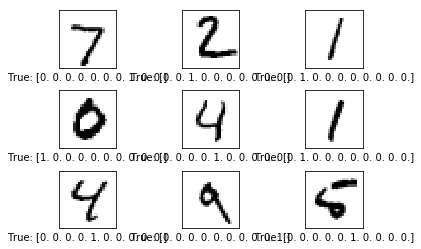

In [26]:
images=data.test.images[0:9]
clsTarget=data.test.labels[0:9]
plotImages(images,clsTarget)

In [35]:
x=tf.placeholder(tf.float32,[None,imgSizeFlat])#(dataType,[dataCount,dataSize])
yTarget=tf.placeholder(tf.float32,[None,noClasses])
yTargetClass=tf.placeholder(tf.int32,[None])
w=tf.Variable(tf.zeros([imgSizeFlat,noClasses]))
b=tf.Variable(tf.zeros([noClasses]))

wxb=tf.matmul(x,w)+b
yPred=tf.nn.softmax(wxb)
yPredClass=tf.argmax(yPred,axis=1)



In [36]:
crossEntropy=tf.nn.softmax_cross_entropy_with_logits(logits=wxb,labels=yTarget)
cost=tf.reduce_mean(crossEntropy)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [38]:
ses=tf.Session()
ses.run(tf.global_variables_initializer())

In [39]:
def optimizer(noIterations):
    for i in range(noIterations):
        xBatch,yTargetBatch=data.train.next_batch(batch_size)
        feedDictTrain={x:xBatch,yTarget:yTargetBatch} 
        #Putting the batch into a dictionary with placeholder variable names
        ses.run(optimizer,feed_dict=feedDictTrain)
        

In [46]:
feedDictTest={x : data.test.images,
            yTarget : data.test.labels,
            yTargetClass : data.test.cls}

def printAccuracy():
    acc=ses.run(accuracy,feed_dict=feedDictTest)
    print("Accuracy on test set: {}".format(acc))

def printConfusionMatrix():
    classTarget=data.y_test_cls
    classPred=ses.run(yPredClass,feed_dict=feedDictTest)
    confMat=confusion_matrix(y_true=classTarget,y_pred=classPred)#sklearn
    print(confMat)
    
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [41]:
def plot9Errors():
    correct, clsPred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feedDictTest)
    incorrect = (correct == False)
    images = data.x_test[incorrect]
    clsPred = clsPred[incorrect]

    # Get the true classes for those images.
    clsTrue = data.y_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                clsTrue=clstrue[0:9],
                clsPred=clsPred[0:9])
    